In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
customer_data = pd.read_csv('Mall_Customers.csv')

In [5]:
customer_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
customer_data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


### Customer Gender Visualisation

In [8]:
import seaborn as sns

c:\Users\ahcha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='count'>

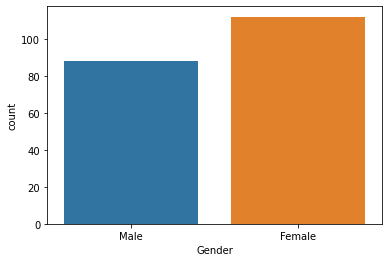

In [9]:
sns.countplot(customer_data['Gender'])

In [10]:
import plotly.express as px


In [11]:
values = customer_data['Gender'].value_counts()
names = customer_data['Gender'].unique().tolist()

fig = px.pie(customer_data,values=values,names=names,title = 'Gender Distribution')
fig.show()

<AxesSubplot:xlabel='Age', ylabel='Count'>

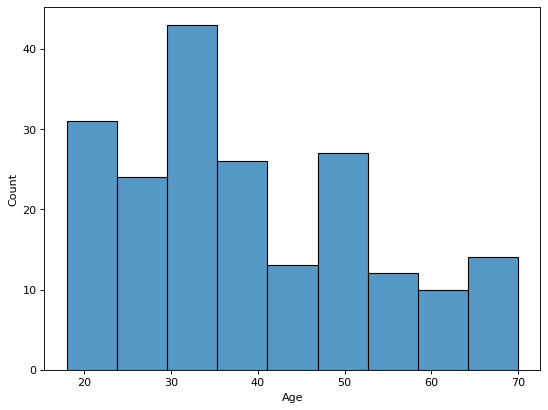

In [12]:
from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=80)

sns.histplot(customer_data['Age'])

c:\Users\ahcha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Age'>

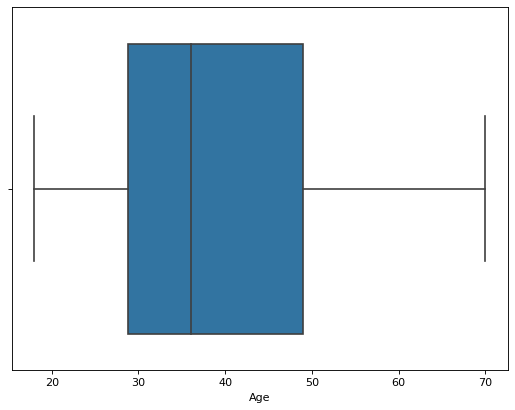

In [13]:
figure(figsize=(8, 6), dpi=80)
sns.boxplot(customer_data['Age'])

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Count'>

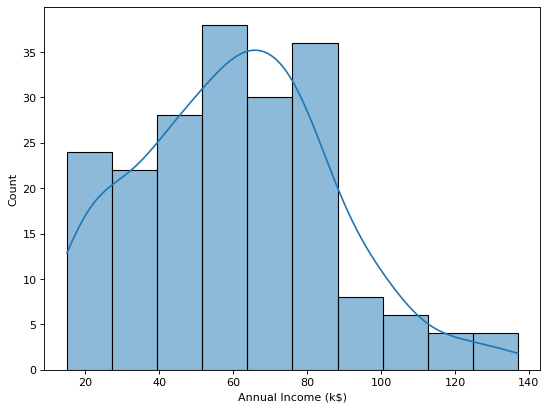

In [14]:
figure(figsize=(8, 6), dpi=80)
sns.histplot(customer_data['Annual Income (k$)'],kde = True)

c:\Users\ahcha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Spending Score (1-100)'>

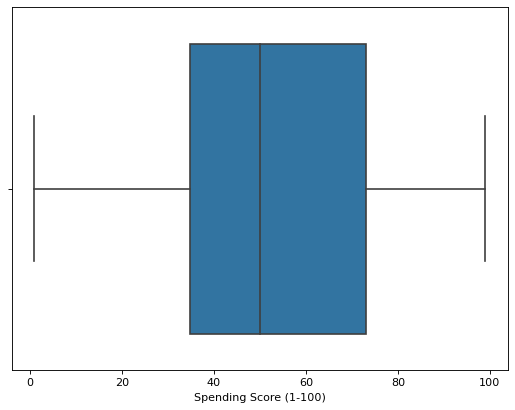

In [15]:
figure(figsize=(8, 6), dpi=80)
sns.boxplot(customer_data['Spending Score (1-100)'])

<AxesSubplot:xlabel='Spending Score (1-100)', ylabel='Count'>

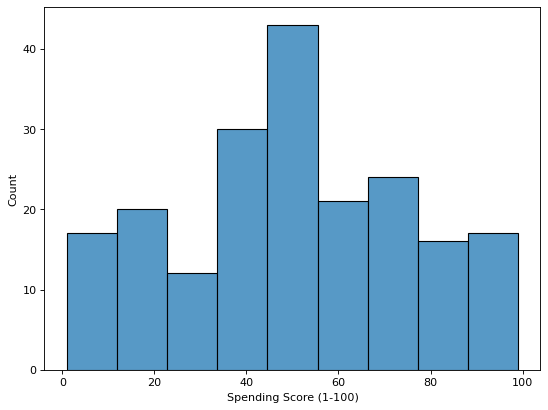

In [16]:
figure(figsize=(8, 6), dpi=80)
sns.histplot(customer_data['Spending Score (1-100)'])

## K-Clustering

In [17]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [18]:
# Let take any random value for k
scaler = MinMaxScaler()


In [19]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [20]:
customer_data = pd.get_dummies(customer_data, columns=['Gender'], drop_first=True)

In [21]:
customer_data['Age'] = scaler.fit_transform(customer_data[['Age']])
customer_data['Annual Income (k$)'] = scaler.fit_transform(customer_data[['Annual Income (k$)']])
customer_data['Spending Score (1-100)'] = scaler.fit_transform(customer_data[['Spending Score (1-100)']])

In [22]:
customer_data.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,1,0.019231,0.000000,0.387755,1
1,2,0.057692,0.000000,0.816327,1
2,3,0.038462,0.008197,0.051020,0
3,4,0.096154,0.008197,0.775510,0
4,5,0.250000,0.016393,0.397959,0


In [23]:
customer_data.sample(20)

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
4,5,0.250000,0.016393,0.397959,0
41,42,0.115385,0.188525,0.928571,1
85,86,0.576923,0.319672,0.459184,1
148,149,0.307692,0.516393,0.214286,0
66,67,0.480769,0.270492,0.500000,0
127,128,0.423077,0.459016,0.959184,1
186,187,0.692308,0.704918,0.234694,0
134,135,0.038462,0.475410,0.040816,1
14,15,0.365385,0.040984,0.122449,1
155,156,0.173077,0.516393,0.897959,0


In [24]:
X = customer_data.iloc[:,1:4]

In [25]:
X.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,0.019231,0.000000,0.387755
1,0.057692,0.000000,0.816327
2,0.038462,0.008197,0.051020
3,0.096154,0.008197,0.775510
4,0.250000,0.016393,0.397959


In [26]:
# Take any random value
km = KMeans(n_clusters=3)

km.fit_predict(X)

array([1, 1, 2, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 2, 1, 1, 1, 0, 0, 0, 0, 1, 2, 1, 1, 2, 1, 2, 1, 0, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1])

In [27]:
k_rng = range(1,10)
sse = []
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(X)
    sse.append(km.inertia_)

c:\Users\ahcha\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



In [28]:
sse

[37.401482160359436,
 22.56077488260975,
 17.370109472896694,
 12.650287676229912,
 10.303964892534122,
 8.385099035848986,
 7.162229912891605,
 6.299201033080282,
 5.595210961765279]

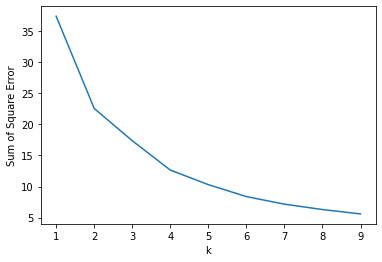

In [29]:
plt.xlabel('k')
plt.ylabel('Sum of Square Error')
plt.plot(k_rng,sse)

In [30]:
km = KMeans(n_clusters=4)
y_predict = km.fit_predict(X)
y_predict

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 3, 0, 0, 0, 1, 1, 1, 1, 0, 3, 2, 2, 3, 2, 3, 2, 1, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2])

In [31]:
from mpl_toolkits import mplot3d

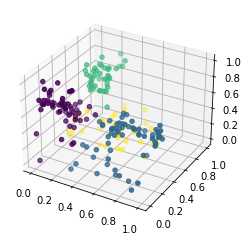

In [34]:

fig = plt.figure()
ax = fig.add_subplot(111,projection = "3d")
ax.scatter(X.iloc[:,0],X.iloc[:,1],X.iloc[:,2],c = y_predict)
plt.show()